In [48]:
%matplotlib inline
%run source/admin_garmin
%run source/admin_axes
%run source/admin_header
%run source/admin_segments
import warnings
warnings.filterwarnings('ignore')
print ("Input file is (full path)  ", input_file_path)

Input file is (full path)   /opt/jupyter/data/csv/activity_898238015_30.csv


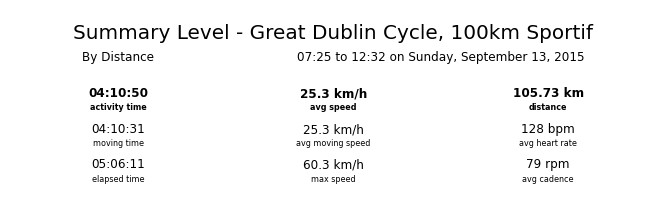

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1,  figsize=(11, 3.2))

create_header(axes, sum_metrics, "Summary Level - Great Dublin Cycle, 100km Sportif", "By Distance")

In [5]:
df.head()

,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving
time,,,,,,,,,,,
2015-09-13 07:25:51+01:00,79.400002,76,5.010,103,53.363708,-6.190183,1,False,0.000,0.0000,False
2015-09-13 07:25:52+01:00,81.680002,77,9.626,104,53.363718,-6.190250,0,False,4.616,0.0000,False
2015-09-13 07:25:53+01:00,83.960002,79,14.242,104,53.363729,-6.190317,0,False,4.616,11.0784,True
2015-09-13 07:25:54+01:00,86.240002,80,18.858,105,53.363740,-6.190384,0,False,4.616,16.6176,True
2015-09-13 07:25:55+01:00,88.520003,82,23.474,105,53.363750,-6.190451,0,False,4.616,16.6176,True


In [4]:
df_moving.head()

,time,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving,interval10
0,2015-09-13 07:25:53+01:00,83.960002,79,14.242000,104,53.363729,-6.190317,0,False,4.616000,11.078400,True,20
1,2015-09-13 07:25:54+01:00,86.240002,80,18.858000,105,53.363740,-6.190384,0,False,4.616000,16.617600,True,20
2,2015-09-13 07:25:55+01:00,88.520003,82,23.474000,105,53.363750,-6.190451,0,False,4.616000,16.617600,True,30
3,2015-09-13 07:25:56+01:00,90.800003,83,28.090000,106,53.363761,-6.190519,5,False,4.616000,16.617600,True,30
4,2015-09-13 07:25:57+01:00,90.800003,84,34.740002,106,53.363779,-6.190614,1,False,6.650002,19.058402,True,40


In [3]:
# full activity level
sum_metrics = get_metrics(df,"Summary")

In [4]:
sum_metrics

{' max_heart_rate': 162,
 'activity_time': datetime.timedelta(0, 15051),
 'activity_time_str': '04:10:50',
 'avg_cadence': 79.0,
 'avg_cadence_str': '79 rpm',
 'avg_heart_rate': 128.0,
 'avg_heart_rate_str': '128 bpm',
 'avg_moving_speed_str': '25.3 km/h',
 'avg_speed': 25.28824818112923,
 'avg_speed_moving': 25.32021177316232,
 'avg_speed_str': '25.3 km/h',
 'break_time': datetime.timedelta(0, 3321),
 'break_time_str': '00:55:21',
 'distance': 105725.95093727112,
 'distance_str': '105.73 km',
 'elapsed_time': Timedelta('0 days 05:06:11'),
 'elapsed_time_str': '05:06:11',
 'end_hr_min_str': '12:32',
 'end_time': Timestamp('2015-09-13 12:32:02+0100', tz='Europe/Dublin'),
 'headline_time_str': '07:25 to 12:32 on Sunday, September 13, 2015',
 'max_cadence': 128,
 'max_speed': 60.309375000000017,
 'max_speed_str': '60.3 km/h',
 'moving_time': datetime.timedelta(0, 15032),
 'moving_time_str': '04:10:31',
 'non_moving_time': datetime.timedelta(0, 3340),
 'start_day_date_str': 'Sunday, Septem

## Basic Data Analytics
Provided by the major fitness websites.    
Sames basic analytics provided to all athletes, irrespective of their level of performance.    
Analytics provided at the summary level over the full duration of the activity.    

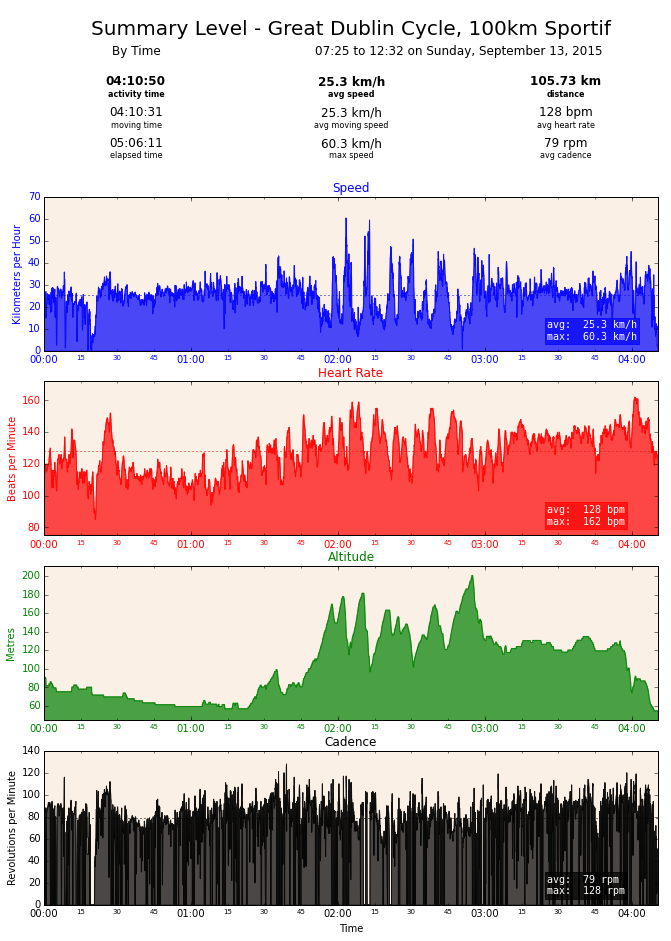

In [5]:
view_type = 'time'
view_description, view_xlabel, view_procedure, view_units = get_view_properties(view_type)

fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(11, 16))

create_header(axes[0], sum_metrics, "Summary Level - Great Dublin Cycle, 100km Sportif", view_description)

plot_control = get_plot_controls('speed',activity_xlabel = '')
view_procedure(df_moving, plot_control, axes[1])

plot_control = get_plot_controls('heart_rate',activity_xlabel = '')
view_procedure(df_moving, plot_control, axes[2])

plot_control = get_plot_controls('altitude',activity_xlabel = '')
view_procedure(df_moving, plot_control, axes[3])

plot_control = get_plot_controls('cadence',activity_xlabel = view_xlabel)
view_procedure(df_moving, plot_control, axes[4])

fig.savefig('summary.png', bbox_inches='tight')

## Break Out by Sessions
Use TimeLine Summary view to identify Sessions

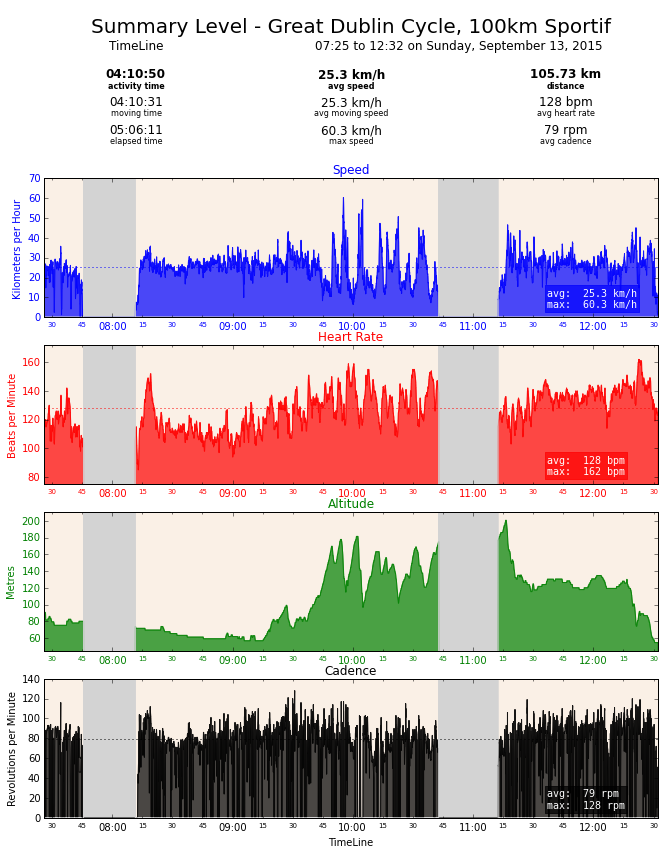

In [6]:
view_type = 'timeline'
view_description, view_xlabel, view_procedure, view_units = get_view_properties(view_type)

fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(11, 16))

create_header(axes[0], sum_metrics, "Summary Level - Great Dublin Cycle, 100km Sportif", view_description)

plot_control = get_plot_controls('speed',activity_xlabel = '')
view_procedure(df, plot_control, axes[1])

plot_control = get_plot_controls('heart_rate',activity_xlabel = '')
view_procedure(df, plot_control, axes[2])

plot_control = get_plot_controls('altitude',activity_xlabel = '')
view_procedure(df, plot_control, axes[3])

plot_control = get_plot_controls('cadence',activity_xlabel = view_xlabel)
view_procedure(df, plot_control, axes[4])

fig.savefig('summary.png', bbox_inches='tight')

In [8]:
sub = create_segments(df)

In [7]:
sub = create_segments(df)
session_metrics = []
session_metrics.append(get_metrics(sub[0],"Session 1 - Clontarf to SmithField"))
session_metrics.append(get_metrics(sub[1],"Session 2 - Smithfield to Garristown"))
session_metrics.append(get_metrics(sub[2],"Session 3 - Garristown to Smithfield"))

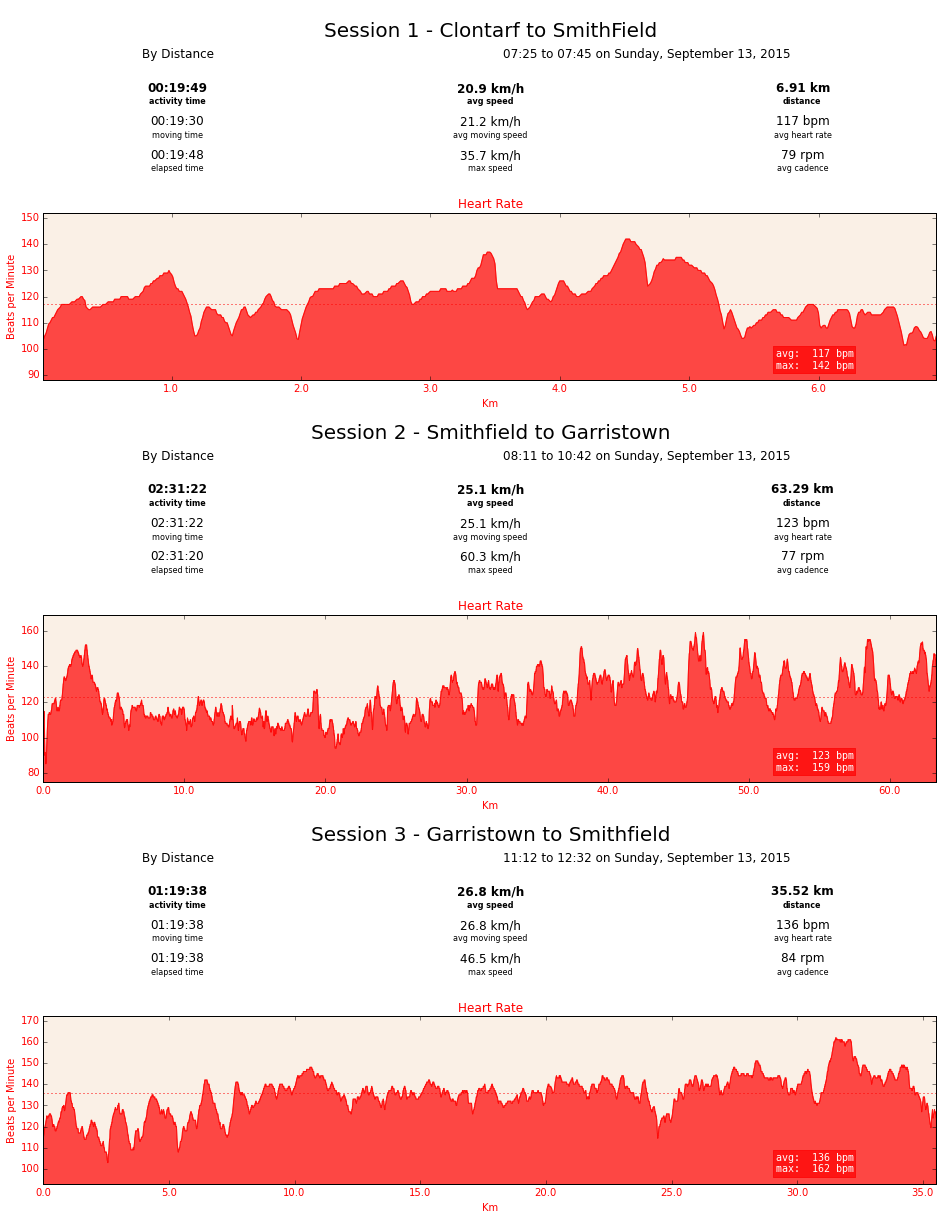

In [8]:
#set column name
#column_name = 'speed'
column_name = 'heart_rate'

view_type = 'distance'
view_description, view_xlabel, view_procedure, view_units = get_view_properties(view_type)
        


fig, axes = plt.subplots(nrows=6, ncols=1,  figsize=(16, 21))

#Speed over distance for sub-activity 1

create_header(axes[0], session_metrics[0], session_metrics[0]['title'], view_description)
plot_control = get_plot_controls(column_name, 
                                 activity_xlabel = view_xlabel,)
view_procedure(sub[0], plot_control, axes[1])

#Speed over distance for sub-activity 2

create_header(axes[2], session_metrics[1], session_metrics[1]['title'], view_description)
plot_control = get_plot_controls(column_name, 
                                 activity_xlabel = view_xlabel,)
view_procedure(sub[1], plot_control, axes[3])

#Speed over distance for sub-activity 3

create_header(axes[4], session_metrics[2], session_metrics[2]['title'], view_description)
plot_control = get_plot_controls(column_name, 
                                 activity_xlabel = view_xlabel,)
view_procedure(sub[2], plot_control, axes[5])

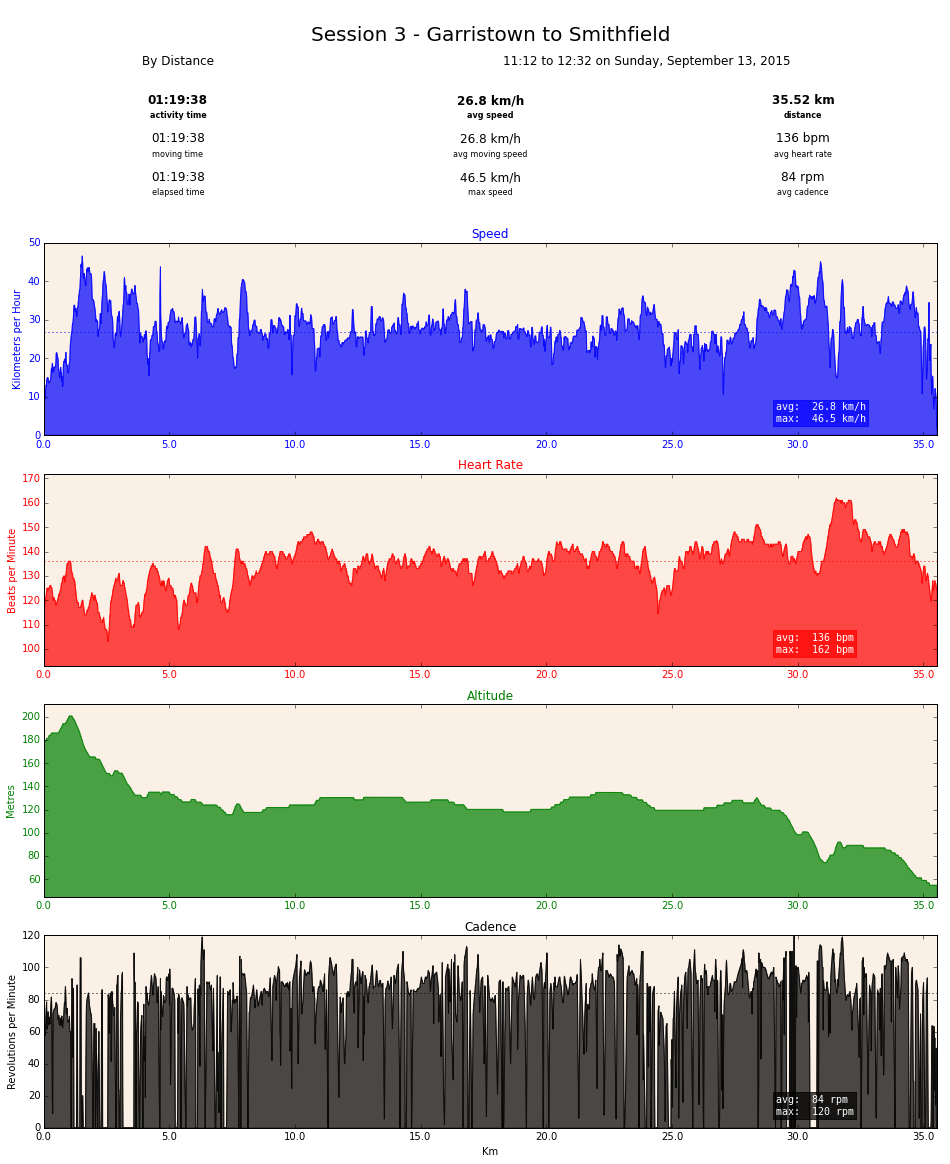

In [9]:
session_num = 3

view_type = 'distance'
view_description, view_xlabel, view_procedure, view_units = get_view_properties(view_type)

fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(16, 20))
sub_activity_number =  session_num - 1

create_header(axes[0], session_metrics[sub_activity_number], 
              session_metrics[sub_activity_number]['title'], view_description)

plot_control = get_plot_controls('speed',activity_xlabel = '')
view_procedure(sub[sub_activity_number], plot_control, axes[1])

plot_control = get_plot_controls('heart_rate',activity_xlabel = '')
view_procedure(sub[sub_activity_number], plot_control, axes[2])

plot_control = get_plot_controls('altitude',activity_xlabel = '')
view_procedure(sub[sub_activity_number], plot_control, axes[3])

plot_control = get_plot_controls('cadence',activity_xlabel = view_xlabel)
view_procedure(sub[sub_activity_number], plot_control, axes[4])


In [10]:
def detail_heading(start_distance, end_distance, title, units):
    return 'Zoom {} to {}{} - {}'.format(start_distance, end_distance,units, title)

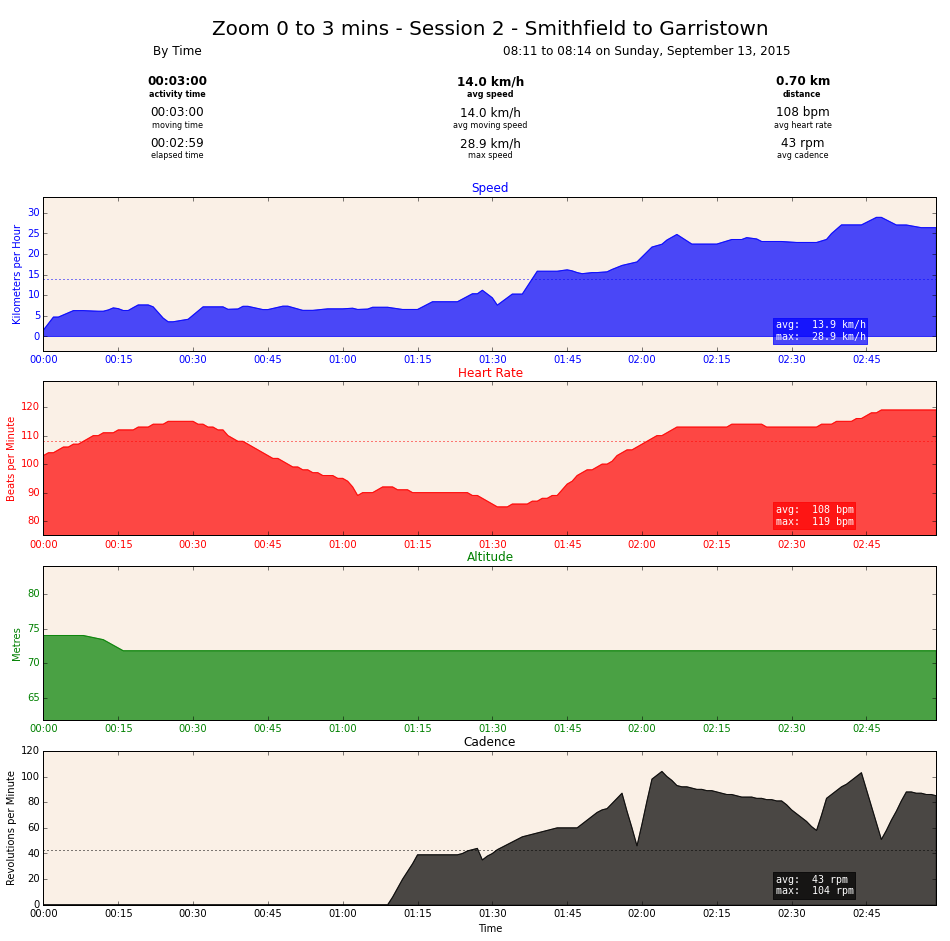

In [54]:
session_num = 2
view_type = 'time'
start_distance = 0
end_distance = 3

view_description, view_xlabel, view_procedure, view_units = get_view_properties(view_type)
sub_activity_number = session_num - 1

session_title = session_metrics[sub_activity_number]['title']
detail_title = detail_heading(start_distance, end_distance, session_title, view_units)


df_seg = sub[sub_activity_number]

if view_type == 'distance':
    df_seg =  df_seg[((df_seg.distance > start_distance*1000) & (df_seg.distance < end_distance*1000))]
elif view_type == 'time':
    df_seg = df_seg[int(start_distance*60.0): int(end_distance*60.0)]

fig, axes = plt.subplots(nrows=5, ncols=1,  figsize=(16, 16))

ses_metrics = get_metrics(df_seg,detail_title)

create_header(axes[0], ses_metrics, ses_metrics['title'],view_description)

plot_control = get_plot_controls('speed',activity_xlabel = '', activity_ylimit_qty=5)
view_procedure(df_seg, plot_control, axes[1])

plot_control = get_plot_controls('heart_rate',activity_xlabel = '')
view_procedure(df_seg, plot_control, axes[2])

plot_control = get_plot_controls('altitude',activity_xlabel = '')
view_procedure(df_seg, plot_control, axes[3])

plot_control = get_plot_controls('cadence',activity_xlabel = view_xlabel)
view_procedure(df_seg, plot_control, axes[4])

In [85]:
sub[1].head()
sub[1][0:2]

,time,altitude,cadence,distance,heart_rate,latitude,longitude,time_diff,breaks,distance_diff,speed,moving,interval10
0,2015-09-13 08:11:27+01:00,74,0,0.000000,103,53.346736,-6.278889,0,False,1.309937,1.571924,True,10
1,2015-09-13 08:11:28+01:00,74,0,1.309937,104,53.346724,-6.278883,0,False,1.309937,3.143848,True,10


In [12]:
def gen_list(start, end, div,view_type):
    
    if view_type == 'distance':
        multiplier = 1000
    elif view_type == 'time':
        multiplier = 60
        
    step = (end - start)* multiplier  /div
    for i in range(div):
        from_value = start*multiplier + i * step 
        to_value = start*multiplier +  i * step + step
        
        if view_type == 'time':
            yield (int(from_value), int(to_value) )
        else:
            yield (from_value, to_value)
        #yield (start*multiplier + i * step, start*multiplier +  i * step + step)
        

def get_list(start, end, div, view_type):
    list_dist = []
    for i in gen_list(start, end, div,view_type):
        list_dist.append(i)
    return list_dist
    

In [14]:
#get_list(start_distance , end_distance, divs)
len(list_dist)
session_num = 2
column_name = 'heart_rate'
view_type = 'time'
start_distance = .5
end_distance = 3.0
divs = 5
list_dist = get_list(start_distance , end_distance, divs, view_type)
list_dist

[(30, 60), (60, 90), (90, 120), (120, 150), (150, 180)]

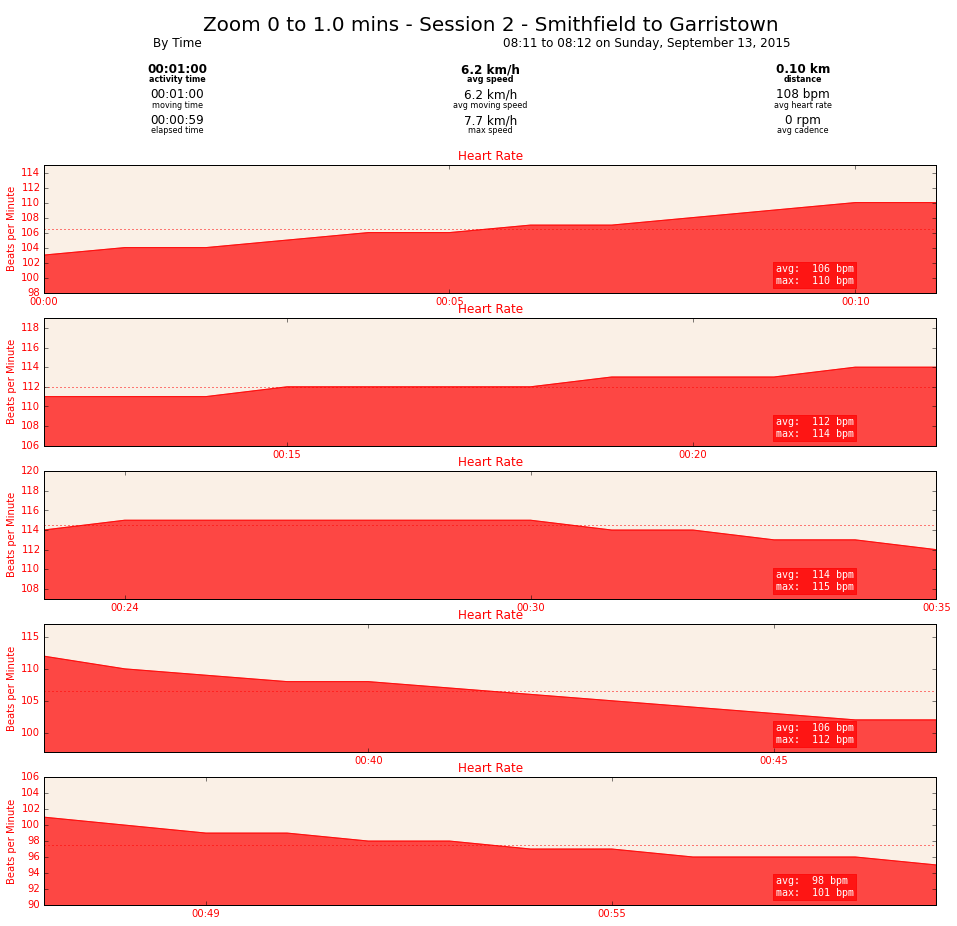

In [53]:
session_num = 2
column_name = 'heart_rate'
view_type = 'time'
start_distance = 0
end_distance = 1.0
divs = 5

view_description, view_xlabel, view_procedure, view_units = get_view_properties(view_type)
sub_activity_number = session_num - 1

session_title = session_metrics[sub_activity_number]['title']
detail_title = detail_heading(start_distance, end_distance, session_title, view_units)


df_seg = sub[sub_activity_number]

if view_type == 'distance':
    df_seg =  df_seg[((df_seg.distance > start_distance*1000) & (df_seg.distance < end_distance*1000))]
#elif view_type == 'time':
#    df_seg = df_seg[int(start_distance*60.0): int(end_distance*60.0)]

if view_type == 'time':
    ses_metrics = get_metrics(df_seg[int(start_distance*60.0): int(end_distance*60.0)],detail_title)
else:
    ses_metrics = get_metrics(df_seg,detail_title)

list_dist = get_list(start_distance , end_distance, divs, view_type)
plot_qty = len(list_dist)

fig, axes = plt.subplots(nrows= plot_qty+1, ncols=1,  figsize=(16, 16))
create_header(axes[0], ses_metrics, ses_metrics['title'],view_description)

plot_control = get_plot_controls( column_name ,activity_xlabel = '', activity_ylimit_qty=5)
#view_procedure(df_seg, plot_control, axes[1])
for plot_num in range( 0, plot_qty ):
    if view_type == 'distance':
        plot_distance(df_seg[((df_seg.distance > list_dist[plot_num][0]) & (df_seg.distance < list_dist[plot_num][1]))]
         , plot_control, axes[plot_num + 1])
    elif view_type == 'time':
        plot_time( df_seg[ list_dist[plot_num][0]: list_dist[plot_num][1] ], plot_control, axes[plot_num + 1])


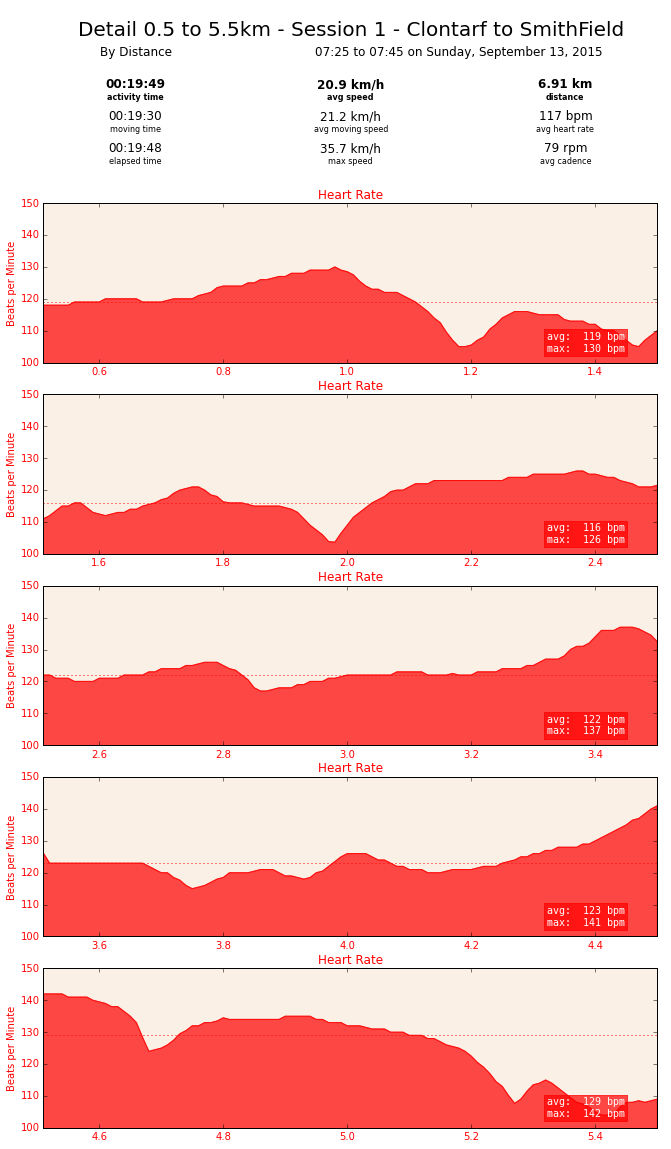

In [92]:
session_num = 1
view_type = 'By Distance'
start_distance = .5
end_distance = 5.5
divs = 5

sub_activity_number = session_num - 1
session_title = session_metrics[sub_activity_number]['title']

detail_title = detail_heading(start_distance, end_distance, session_title)

list_dist = get_list(start_distance , end_distance, divs)

ses_metrics = get_metrics(df_seg,detail_title)
plot_qty = len(list_dist)
fig, axes = plt.subplots(nrows=plot_qty + 1, ncols=1,  figsize=(11, 20))
create_header(axes[0], ses_metrics, ses_metrics['title'],'By Distance')

df_seg = sub[sub_activity_number]

#output_header(df, axes)




plot_control = get_plot_controls('heart_rate',activity_xlabel = '')
for plot_num in range( 0, plot_qty ):
    plot_distance(df_seg[((df_seg.distance > list_dist[plot_num][0]) & (df_seg.distance < list_dist[plot_num][1]))]
         , plot_control, axes[plot_num + 1])



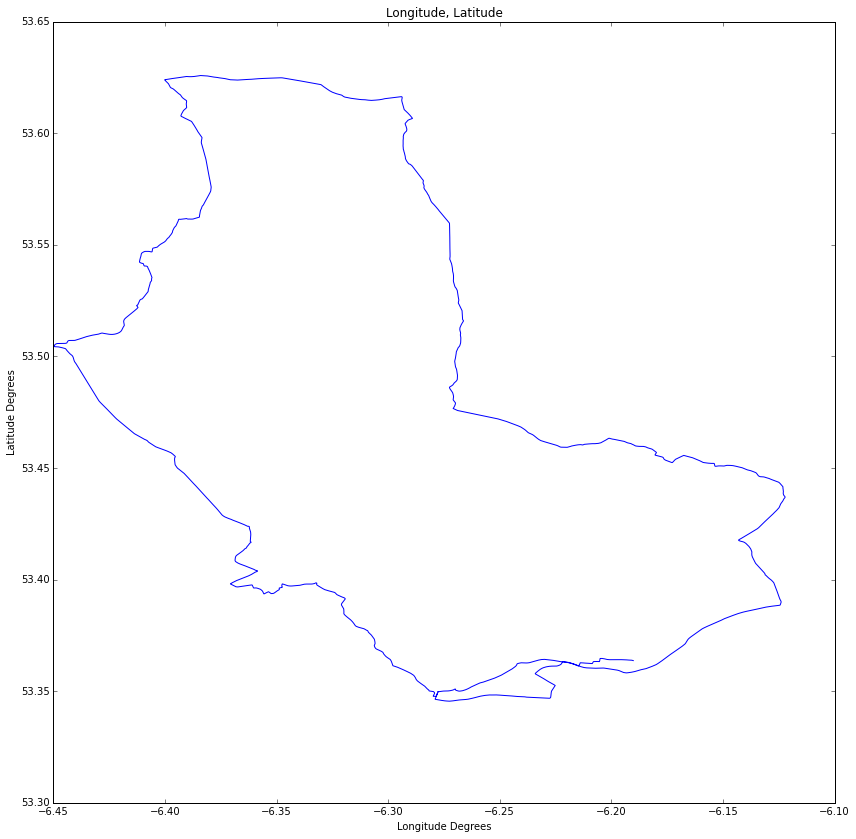

In [10]:
# new style method 2; use an axes array

fig2, axs2 = plt.subplots(1,1,  figsize=(14, 14))
axs2.set_title('Longitude, Latitude')
axs2.set_xlabel('Longitude Degrees')
axs2.set_ylabel('Latitude Degrees')
_ = axs2.plot(df.longitude, df.latitude)

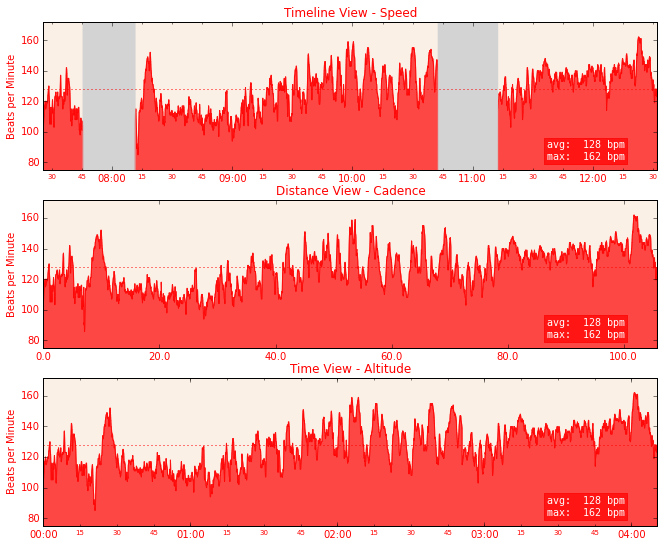

In [116]:
fig, axes = plt.subplots(nrows=3, ncols=1,  figsize=(11, 10))

#Speed over local time with breaks
#plot_control = get_plot_controls('heart_rate', activity_title = 'Timeline View - Heart Rate',)
plot_control = get_plot_controls('heart_rate', activity_title = 'Timeline View - Speed',activity_xlabel = '',)
_ = plot_timeline(df, plot_control, axes[0])

#Speed over distance
#plot_control = get_plot_controls('heart_rate', activity_title = 'Distance View - Heart Rate',)
plot_control = get_plot_controls('heart_rate', activity_title = 'Distance View - Cadence',activity_xlabel = '',)
_ = plot_distance(df_moving, plot_control, axes[1])

#Speed over activity time
#plot_control = get_plot_controls('heart_rate', activity_title = 'Time View - Heart Rate',)
plot_control = get_plot_controls('heart_rate', activity_title = 'Time View - Altitude',activity_xlabel = '',)
_ = plot_time(df_moving, plot_control, axes[2])
